In [257]:
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
movies_original_df = pd.read_csv("movies.csv")
movies_df = movies_original_df.copy()
#movies_df.info()
#print(movies_df.head())

Clean and transform the above dataset to add the following columns: Start year, end year, director, actors.

In [259]:
#split year in to start year and end year (delimiter is not hyphen, it is a different character. copy paste the delimiter from dataframe)
#movies_df["YEAR"] = movies_df["YEAR"].str.strip("()")
movies_df[["START YEAR", "END YEAR"]] = movies_df["YEAR"].str.strip("()").str.split(pat="–", expand = True)
#movies_df.head()

In [260]:
#separate stars into director and actors, remove \n and | characters
movies_df[["DIRECTOR", "ACTORS"]] = movies_df["STARS"].str.replace("\n"," ").str.split("Stars:", expand = True)
movies_df["DIRECTOR"] = movies_df["DIRECTOR"].str.strip(" |").str.split("Director:", expand = True)[1]
movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START YEAR,END YEAR,DIRECTOR,ACTORS
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021,None,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander..."
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021,,None,"Chris Wood, Sarah Michelle Gellar, Lena Hea..."
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010,2022,None,"Andrew Lincoln, Norman Reedus, Melissa McBr..."
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013,,None,"Justin Roiland, Chris Parnell, Spencer Gram..."
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021,None,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, R..."


Your company wants to perform some analysis on a movies gross margin.  Please create a new csv that contains a subset of the original data where "Gross" is a known value, and all other numerical statistics are present

In [261]:
#Find not null values of gross and other numerical data and write to a new csv file
movies_subset_df = movies_original_df.dropna(subset=["YEAR", "RATING", "VOTES", "RunTime", "Gross"])
movies_subset_df.info()
movies_subset_df.to_csv("movies_subset.csv")
#movies_subset_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 77 to 6292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    460 non-null    object 
 1   YEAR      460 non-null    object 
 2   GENRE     460 non-null    object 
 3   RATING    460 non-null    float64
 4   ONE-LINE  460 non-null    object 
 5   STARS     460 non-null    object 
 6   VOTES     460 non-null    object 
 7   RunTime   460 non-null    float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 35.9+ KB


Create a visualization to show what (if any) correlation there is between rating and the length of the movie's description.

In [262]:
#find the length of the movie description
movies_subset_copy_df = movies_subset_df.copy()
movies_subset_copy_df["DESCRIPTION_LENGTH"] = movies_subset_df["ONE-LINE"].str.replace("\n", " ").str.len()
#movies_subset_copy_df.info()
movies_subset_copy_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,DESCRIPTION_LENGTH
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M,197
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M,180
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M,133
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M,153
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M,100


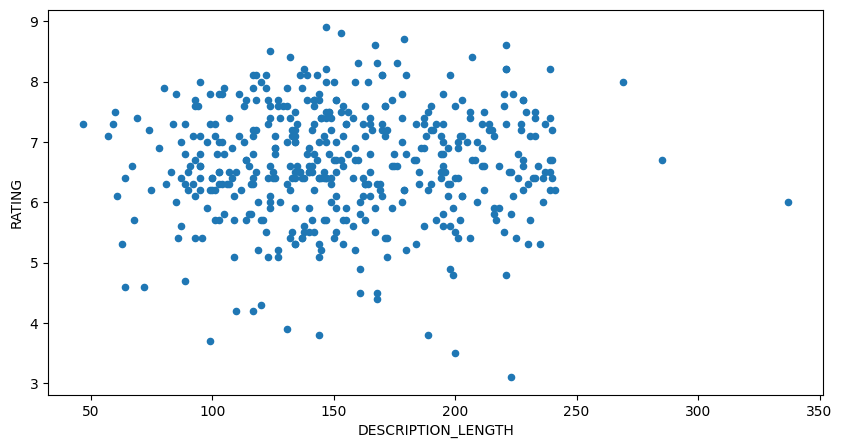

Correlation between DESCRIPTION_LENGTH and RATING IS  0.03


In [263]:
#Making a scatter plot to find if there is any correlation between movie description and rating
movies_subset_copy_df.plot.scatter(x="DESCRIPTION_LENGTH", y="RATING", figsize=(10,5))
plt.show()
corr = movies_subset_copy_df["DESCRIPTION_LENGTH"].corr(movies_subset_copy_df["RATING"])
print("Correlation between DESCRIPTION_LENGTH and RATING IS " , round(corr,2))